## (1) Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from autots import AutoTS

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Record version of key libraries
from importlib.metadata import version

print('autots==%s' % version('autots'))

autots==0.3.2


## (2) Get data

In [3]:
# Read local data
uni_data_df = pd.read_csv("../data/air_passengers.csv")
multi_data_df = pd.read_csv("../data/multi_ts.csv", index_col=0)

# Set column names so that constructor can recognise the data
uni_data_df.columns = ['time', 'value']
multi_data_df.columns = ['time', 'v1', 'v2']

# Add a column to identify series ID
uni_data_df['series_id'] = 'grp1'

# Convert multivariate df to use datetime index
multi_data_df.index = pd.to_datetime(multi_data_df['time'])
multi_data_df.drop(columns=['time'], inplace=True)

print(uni_data_df.head())

print(multi_data_df.head())

         time  value series_id
0  1949-01-01    112      grp1
1  1949-02-01    118      grp1
2  1949-03-01    132      grp1
3  1949-04-01    129      grp1
4  1949-05-01    121      grp1
               v1    v2
time                   
2017-03-12 -0.109  53.8
2017-03-13  0.000  53.6
2017-03-14  0.178  53.5
2017-03-15  0.339  53.5
2017-03-16  0.373  53.4


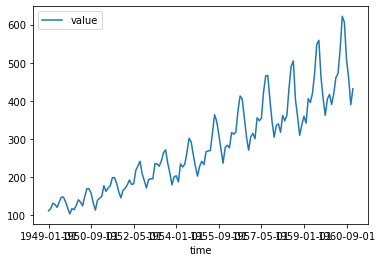

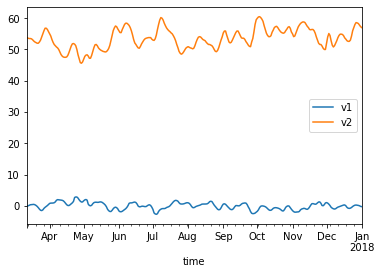

In [4]:
# Visualise data
uni_data_df.set_index('time').plot()
plt.show()

multi_data_df.plot()
plt.show()

## (3A) Compare models - univariate

Models supported are :
- ZeroesNaive
- LastValueNaive
- AverageValueNaive
- SeasonalNaive
- GLM
- ETS
- UnobservedComponents
- ARIMA
- FBProphet
- TSFreshRegressor
- DatepartRegression
- UnivariateRegression

- GLS
- VARMAX
- DynamicFactor
- VECM
- VAR
- GluonTS
- RollingRegression
- WindowRegression
- MotifSimulation
- TensorflowSTS
- TFPRegression
- ComponentAnalysis

In [5]:
# Split training and testing data

forecast_length = 12

uni_train_df = uni_data_df.iloc[:-forecast_length,:]

# Setup automated model testing

# NOTE - see model list from here
# from autots.models.model_list import model_lists

uni_model = AutoTS(
    forecast_length=forecast_length,
    frequency='infer',
    prediction_interval=0.9,
    max_generations=10, # number of genetic algorithms generations to run
    ensemble='all',
    model_list='fast',
	transformer_list='fast',
    num_validations=3,
    validation_method="backwards",
    random_seed=6,
    n_jobs='auto'
)

# Run models evaluation

uni_model = uni_model.fit(
    uni_train_df,
    date_col='time',
    value_col='value',
    id_col='series_id',
)

Inferred frequency is: MS
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 120') in model 3: AverageValueNaive
Model Number: 4 with model ETS in generation 0 of 10
Model Number: 5 with model ETS in generation 0 of 10
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 120') in model 5: ETS
Model Number: 6 with model GLM in generation 0 of 10
Model Number: 7 with model GLM in generation 0 of 10
Model Number: 8 with model GLS in generation 0 of 10
Model Number: 9 with model GLS in generation 0 of 10
Model Number: 10 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 10: GluonTS
Model Number: 11 with model Glu

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: RuntimeError('dictionary changed size during iteration') in model 142: ComponentAnalysis
Model Number: 143 with model ComponentAnalysis in generation 2 of 10
Template Eval Error: ValueError('n_components and decomposition not suitable for this dataset.') in model 143: ComponentAnalysis
Model Number: 144 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 144: GluonTS
Model Number: 145 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 145: GluonTS
Model Number: 146 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 146: GluonTS
Model Number: 147 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('Gluon

/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 330 with model GLM in generation 7 of 10
Model Number: 331 with model GLM in generation 7 of 10
Model Number: 332 with model GLM in generation 7 of 10
Template Eval Error: PerfectSeparationError('Perfect separation detected, results not available') in model 332: GLM
Model Number: 333 with model GLS in generation 7 of 10
Model Number: 334 with model GLS in generation 7 of 10
Model Number: 335 with model ComponentAnalysis in generation 7 of 10
Template Eval Error: ValueError('n_components and decomposition not suitable for this dataset.') in model 335: ComponentAnalysis
Model Number: 336 with model ComponentAnalysis in generation 7 of 10
Model Number: 337 with model ComponentAnalysis in generation 7 of 10
Template Eval Error: ValueError('n_components and decomposition not suitable for this dataset.') in model 337: ComponentAnalysis
Model Number: 338 with model ETS in generation 7 of 10
Model Number: 339 with model ETS in generation 7 of 10
Model Number: 340 with model ETS i

In [6]:
print(uni_model)

Initiated AutoTS object with best model: 
Ensemble
{}
{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"d5a91290d0706ea8b10f4ec956a92f9f": {"Model": "WindowRegression", "ModelParameters": "{\"window_size\": 20, \"regression_model\": {\"model\": \"Adaboost\", \"model_params\": {\"n_estimators\": 50, \"loss\": \"linear\", \"base_estimator\": \"DecisionTree\", \"learning_rate\": 1.0}}, \"input_dim\": \"multivariate\", \"output_dim\": \"1step\", \"normalize_window\": false, \"shuffle\": false, \"max_windows\": 5000}", "TransformationParameters": "{\"fillna\": \"ffill\", \"transformations\": {\"0\": \"RobustScaler\", \"1\": \"Detrend\"}, \"transformation_params\": {\"0\": {}, \"1\": {\"model\": \"Linear\"}}}"}}, "series": {"grp1": "d5a91290d0706ea8b10f4ec956a92f9f"}}


## (3B) Compare models - multivariate

Models supported are :
- GLS
- VARMAX
- DynamicFactor
- VECM
- VAR
- GluonTS
- RollingRegression
- WindowRegression
- MotifSimulation
- TensorflowSTS
- TFPRegression
- ComponentAnalysis

In [7]:
# Split training and testing data

forecast_length = 12

multi_train_df = multi_data_df.iloc[:-forecast_length,:]

# Setup automated model testing

multi_model = AutoTS(
    forecast_length=forecast_length,
    frequency='infer',
    prediction_interval=0.9,
    max_generations=10, # number of genetic algorithms generations to run
    ensemble='all',
    model_list='multivariate',
	transformer_list='fast',
    num_validations=3,
    validation_method="backwards",
    random_seed=6,
    n_jobs='auto'
)

# Run models evaluation
# NOTE - for multivariate models, set time as index, do not keep series_id column and leave rest of variables as columns.

multi_model = multi_model.fit(
    multi_train_df
)

Inferred frequency is: D
Model Number: 1 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 1: GluonTS
Model Number: 2 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 2: GluonTS
Model Number: 3 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 3: GluonTS
Model Number: 4 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 4: GluonTS
Model Number: 5 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 5: GluonTS
Model

/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 20 with model VARMAX in generation 0 of 10
Model Number: 21 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 21: WindowRegression
Model Number: 22 with model WindowRegression in generation 0 of 10
Model Number: 23 with model WindowRegression in generation 0 of 10
Model Number: 24 with model ComponentAnalysis in generation 0 of 10
Model Number: 25 with model VAR in generation 0 of 10
Model Number: 26 with model ComponentAnalysis in generation 0 of 10
Model Number: 27 with model VECM in generation 0 of 10
Model Number: 28 with model VECM in generation 0 of 10
Model Number: 29 with model RollingRegression in generation 0 of 10
Template Eval Error: LightGBMError('Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .\n') in model 29: RollingRe

/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 47 with model VECM in generation 0 of 10
Model Number: 48 with model RollingRegression in generation 0 of 10
Model Number: 49 with model VECM in generation 0 of 10
Model Number: 50 with model WindowRegression in generation 0 of 10
Model Number: 51 with model DynamicFactor in generation 0 of 10
Template Eval Error: ValueError('Number of factors must be less than the number of endogenous variables.') in model 51: DynamicFactor
Model Number: 52 with model VECM in generation 0 of 10
Model Number: 53 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 53: WindowRegression
Model Number: 54 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 54: GluonTS
New Generation: 1 of 10
Model Number: 55 with model VECM in generation 1 of 10
Model Number: 56 with m

/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 75 with model VARMAX in generation 1 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 76 with model VARMAX in generation 1 of 10
Model Number: 77 with model VARMAX in generation 1 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 78 with model DynamicFactor in generation 1 of 10
Template Eval Error: ValueError('Number of factors must be less than the number of endogenous variables.') in model 78: DynamicFactor
Model Number: 79 with model DynamicFactor in generation 1 of 10
Template Eval Error: ValueError('Number of factors must be less than the number of endogenous variables.') in model 79: DynamicFactor
Model Number: 80 with model DynamicFactor in generation 1 of 10
Template Eval Error: ValueError('Number of factors must be less than the number of endogenous variables.') in model 80: DynamicFactor
Model Number: 81 with model DynamicFactor in generation 1 of 10
Template Eval Error: ValueError('Number of factors must be less than the number of endogenous variables.') in model 81: DynamicFactor
Model Number: 82 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 82: GluonTS
Model Number

/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 106 with model VARMAX in generation 2 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 107 with model VARMAX in generation 2 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 108 with model VARMAX in generation 2 of 10
Model Number: 109 with model DynamicFactor in generation 2 of 10
Template Eval Error: ValueError('Number of factors must be less than the number of endogenous variables.') in model 109: DynamicFactor
Model Number: 110 with model DynamicFactor in generation 2 of 10
Template Eval Error: ValueError('Number of factors must be less than the number of endogenous variables.') in model 110: DynamicFactor
Model Number: 111 with model DynamicFactor in generation 2 of 10
Template Eval Error: ValueError('Number of factors must be less than the number of endogenous variables.') in model 111: DynamicFactor
Model Number: 112 with model DynamicFactor in generation 2 of 10
Template Eval Error: ValueError('Number of factors must be less than the number of endogenous variables.') in model 112: DynamicFactor
Model Number: 113 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed versi

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 135 with model ComponentAnalysis in generation 3 of 10
Model Number: 136 with model VARMAX in generation 3 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 137 with model VARMAX in generation 3 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 138 with model VARMAX in generation 3 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 139 with model DynamicFactor in generation 3 of 10
Template Eval Error: ValueError('Number of factors must be less than the number of endogenous variables.') in model 139: DynamicFactor
Model Number: 140 with model DynamicFactor in generation 3 of 10
Model Number: 141 with model DynamicFactor in generation 3 of 10
Template Eval Error: ValueError('Number of factors must be less than the number of endogenous variables.') in model 141: DynamicFactor
Model Number: 142 with model DynamicFactor in generation 3 of 10
Template Eval Error: ValueError('Number of factors must be less than the number of endogenous variables.') in model 142: DynamicFactor
Model Number: 143 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 143: GluonTS
Model Number: 144 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed 

/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 166 with model VARMAX in generation 4 of 10
Model Number: 167 with model VARMAX in generation 4 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 168 with model VARMAX in generation 4 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 169 with model DynamicFactor in generation 4 of 10
Model Number: 170 with model DynamicFactor in generation 4 of 10
Model Number: 171 with model DynamicFactor in generation 4 of 10
Model Number: 172 with model DynamicFactor in generation 4 of 10
Model Number: 173 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 173: GluonTS
Model Number: 174 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 174: GluonTS
Model Number: 175 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 175: GluonTS
New Generation: 5 of 10
Model Number: 176 with model VECM in generation 5 of 10
Model Number: 177 with model VECM in generation 5 of 10
Model Numb

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    2.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Model Number: 182 with model WindowRegression in generation 5 of 10
Model Number: 183 with model WindowRegression in generation 5 of 10


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    2.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 183: WindowRegression
Model Number: 184 with model VAR in generation 5 of 10
Model Number: 185 with model VAR in generation 5 of 10
Model Number: 186 with model VAR in generation 5 of 10
Model Number: 187 with model VAR in generation 5 of 10
Model Number: 188 with model RollingRegression in generation 5 of 10
Model Number: 189 with model RollingRegression in generation 5 of 10
Model Number: 190 with model RollingRegression in generation 5 of 10
Model Number: 191 with model RollingRegression in generation 5 of 10
Model Number: 192 with model ComponentAnalysis in generation 5 of 10
Template Eval Error: ValueError('n_components and decomposition not suitable for this dataset.') in model 192: ComponentAnalysis
Model Number: 193 with model ComponentAnalysis in generation 5 of 10
Model Number: 194 with model ComponentAnalysis in generation 5 of 10
Model Number: 195 with model D

/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 198 with model DynamicFactor in generation 5 of 10
Model Number: 199 with model VARMAX in generation 5 of 10
Model Number: 200 with model VARMAX in generation 5 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 201 with model VARMAX in generation 5 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 202 with model VARMAX in generation 5 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 203 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 203: GluonTS
Model Number: 204 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 204: GluonTS
Model Number: 205 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 205: GluonTS
Model Number: 206 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 206: GluonTS
New Generation: 6 of 10
Model Number: 207 with model WindowRegression in generation 6 of 10
Model Number: 208 with model WindowRegression in generation 6 of 10


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    1.9s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Paral

Model Number: 209 with model WindowRegression in generation 6 of 10
Model Number: 210 with model WindowRegression in generation 6 of 10
Model Number: 211 with model VECM in generation 6 of 10
Model Number: 212 with model VECM in generation 6 of 10
Model Number: 213 with model VECM in generation 6 of 10
Model Number: 214 with model VECM in generation 6 of 10
Model Number: 215 with model DynamicFactor in generation 6 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 216 with model DynamicFactor in generation 6 of 10
Model Number: 217 with model DynamicFactor in generation 6 of 10
Template Eval Error: ValueError('Number of factors must be less than the number of endogenous variables.') in model 217: DynamicFactor
Model Number: 218 with model DynamicFactor in generation 6 of 10
Template Eval Error: ValueError('Number of factors must be less than the number of endogenous variables.') in model 218: DynamicFactor
Model Number: 219 with model VAR in generation 6 of 10
Model Number: 220 with model VAR in generation 6 of 10
Model Number: 221 with model VAR in generation 6 of 10
Model Number: 222 with model VAR in generation 6 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 223 with model VARMAX in generation 6 of 10
Model Number: 224 with model VARMAX in generation 6 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 225 with model VARMAX in generation 6 of 10
Model Number: 226 with model VARMAX in generation 6 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 227 with model RollingRegression in generation 6 of 10
Model Number: 228 with model RollingRegression in generation 6 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 247 with model DynamicFactor in generation 7 of 10
Model Number: 248 with model DynamicFactor in generation 7 of 10
Model Number: 249 with model DynamicFactor in generation 7 of 10
Model Number: 250 with model VAR in generation 7 of 10
Template Eval Error: LinAlgError('1-th leading minor of the array is not positive definite') in model 250: VAR
Model Number: 251 with model VAR in generation 7 of 10
Model Number: 252 with model VAR in generation 7 of 10
Template Eval Error: LinAlgError('1-th leading minor of the array is not positive definite') in model 252: VAR
Model Number: 253 with model VAR in generation 7 of 10
Model Number: 254 with model VARMAX in generation 7 of 10
Model Number: 255 with model VARMAX in generation 7 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 256 with model VARMAX in generation 7 of 10
Model Number: 257 with model RollingRegression in generation 7 of 10
Model Number: 258 with model RollingRegression in generation 7 of 10


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    2.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Paral

Model Number: 259 with model RollingRegression in generation 7 of 10
Model Number: 260 with model RollingRegression in generation 7 of 10
Model Number: 261 with model ComponentAnalysis in generation 7 of 10
Template Eval Error: ValueError('n_components and decomposition not suitable for this dataset.') in model 261: ComponentAnalysis
Model Number: 262 with model ComponentAnalysis in generation 7 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 263 with model ComponentAnalysis in generation 7 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 264 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 264: GluonTS
Model Number: 265 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 265: GluonTS
Model Number: 266 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 266: GluonTS
Model Number: 267 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 267: GluonTS
New Generation: 8 of 10
Model Number: 268 with model WindowRegression in generation 8 of 10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (nu

/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 285 with model VARMAX in generation 8 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 286 with model VARMAX in generation 8 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 287 with model RollingRegression in generation 8 of 10
Model Number: 288 with model RollingRegression in generation 8 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 288: RollingRegression
Model Number: 289 with model RollingRegression in generation 8 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 289: RollingRegression
Model Number: 290 with model RollingRegression in generation 8 of 10
Model Number: 291 with model ComponentAnalysis in generation 8 of 10
Template Eval Error: ValueError('n_components and decomposition not suitable for this dataset.') in model 291: ComponentAnalysis
Model Number: 292 with model ComponentAnalysis in generation 8 of 10
Template Eval Error: ValueError('n_components and decomposition not suitable for this dataset.') in model 292: ComponentAnalysis
Model Number: 293 with model ComponentAnalysis in generation 8 of 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    2.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Model Number: 301 with model WindowRegression in generation 9 of 10
Model Number: 302 with model VECM in generation 9 of 10
Model Number: 303 with model VECM in generation 9 of 10
Model Number: 304 with model VECM in generation 9 of 10
Model Number: 305 with model VECM in generation 9 of 10
Model Number: 306 with model DynamicFactor in generation 9 of 10
Model Number: 307 with model DynamicFactor in generation 9 of 10
Template Eval Error: ValueError('Number of factors must be less than the number of endogenous variables.') in model 307: DynamicFactor
Model Number: 308 with model VAR in generation 9 of 10
Model Number: 309 with model VAR in generation 9 of 10
Model Number: 310 with model VAR in generation 9 of 10
Model Number: 311 with model VAR in generation 9 of 10
Model Number: 312 with model VARMAX in generation 9 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 313 with model VARMAX in generation 9 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 314 with model VARMAX in generation 9 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 315 with model VARMAX in generation 9 of 10
Model Number: 316 with model RollingRegression in generation 9 of 10
Model Number: 317 with model RollingRegression in generation 9 of 10
Model Number: 318 with model RollingRegression in generation 9 of 10
Model Number: 319 with model RollingRegression in generation 9 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 319: RollingRegression
Model Number: 320 with model ComponentAnalysis in generation 9 of 10
Template Eval Error: ValueError('n_components and decomposition not suitable for this dataset.') in model 320: ComponentAnalysis
Model Number: 321 with model ComponentAnalysis in generation 9 of 10
Model Number: 322 with model ComponentAnalysis in generation 9 of 10
Template Eval Error: ValueError('n_components and decomposition not suitable for this dataset.') in model 322: ComponentAnalysis
Model Number: 323 with model GluonTS in generation 9 of 10
Tem

/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 344 with model VARMAX in generation 10 of 10
Model Number: 345 with model VARMAX in generation 10 of 10


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 346 with model RollingRegression in generation 10 of 10
Model Number: 347 with model RollingRegression in generation 10 of 10
Model Number: 348 with model RollingRegression in generation 10 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 348: RollingRegression
Model Number: 349 with model RollingRegression in generation 10 of 10
Model Number: 350 with model Ensemble in generation 0 of 0
Model Number: 351 with model Ensemble in generation 0 of 0
Model Number: 352 with model Ensemble in generation 0 of 0
Model Number: 353 with model Ensemble in generation 0 of 0
Model Number: 354 with model Ensemble in generation 0 of 0
Model Number: 355 with model Ensemble in generation 0 of 0
Validation Round: 1
Model Number: 1 of 56 with model Ensemble for Validation 1
Model Number: 2 of 56 with model Ensemble for Validation 1
Model Number: 3 of 56 with model Ensemble for Validation 1
Model Number: 4 of 56 with mod

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    1.9s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Model Number: 10 of 56 with model VECM for Validation 1
Model Number: 11 of 56 with model VECM for Validation 1
Model Number: 12 of 56 with model VECM for Validation 1
Model Number: 13 of 56 with model VECM for Validation 1
Model Number: 14 of 56 with model VECM for Validation 1
Model Number: 15 of 56 with model VECM for Validation 1
Model Number: 16 of 56 with model VECM for Validation 1
Model Number: 17 of 56 with model VARMAX for Validation 1
Model Number: 18 of 56 with model DynamicFactor for Validation 1
Model Number: 19 of 56 with model VARMAX for Validation 1


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 20 of 56 with model WindowRegression for Validation 1
Model Number: 21 of 56 with model WindowRegression for Validation 1
Model Number: 22 of 56 with model WindowRegression for Validation 1
Model Number: 23 of 56 with model WindowRegression for Validation 1
Model Number: 24 of 56 with model Ensemble for Validation 1
Model Number: 25 of 56 with model VAR for Validation 1
Model Number: 26 of 56 with model VAR for Validation 1
Model Number: 27 of 56 with model VARMAX for Validation 1
Model Number: 28 of 56 with model WindowRegression for Validation 1
Model Number: 29 of 56 with model VARMAX for Validation 1
Model Number: 30 of 56 with model VAR for Validation 1
Model Number: 31 of 56 with model VAR for Validation 1
Model Number: 32 of 56 with model VAR for Validation 1
Model Number: 33 of 56 with model DynamicFactor for Validation 1


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 34 of 56 with model DynamicFactor for Validation 1


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 35 of 56 with model VAR for Validation 1
Model Number: 36 of 56 with model VAR for Validation 1
Model Number: 37 of 56 with model RollingRegression for Validation 1
Model Number: 38 of 56 with model VARMAX for Validation 1


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 39 of 56 with model VAR for Validation 1
Model Number: 40 of 56 with model ComponentAnalysis for Validation 1
Model Number: 41 of 56 with model ComponentAnalysis for Validation 1
Model Number: 42 of 56 with model VARMAX for Validation 1


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 43 of 56 with model VARMAX for Validation 1


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 44 of 56 with model RollingRegression for Validation 1
Model Number: 45 of 56 with model VARMAX for Validation 1


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 46 of 56 with model DynamicFactor for Validation 1
Model Number: 47 of 56 with model RollingRegression for Validation 1
Model Number: 48 of 56 with model DynamicFactor for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 49 of 56 with model ComponentAnalysis for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 50 of 56 with model DynamicFactor for Validation 1
Model Number: 51 of 56 with model DynamicFactor for Validation 1
Model Number: 52 of 56 with model RollingRegression for Validation 1
Model Number: 53 of 56 with model ComponentAnalysis for Validation 1
Model Number: 54 of 56 with model RollingRegression for Validation 1
Model Number: 55 of 56 with model VARMAX for Validation 1


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 56 of 56 with model VECM for Validation 1
Validation Round: 2
Model Number: 1 of 56 with model Ensemble for Validation 2
Model Number: 2 of 56 with model Ensemble for Validation 2
Model Number: 3 of 56 with model Ensemble for Validation 2
Model Number: 4 of 56 with model Ensemble for Validation 2
Model Number: 5 of 56 with model Ensemble for Validation 2
Model Number: 6 of 56 with model WindowRegression for Validation 2
Model Number: 7 of 56 with model WindowRegression for Validation 2
Model Number: 8 of 56 with model VECM for Validation 2
Model Number: 9 of 56 with model WindowRegression for Validation 2


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    1.9s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Model Number: 10 of 56 with model VECM for Validation 2
Model Number: 11 of 56 with model VECM for Validation 2
Model Number: 12 of 56 with model VECM for Validation 2
Model Number: 13 of 56 with model VECM for Validation 2
Model Number: 14 of 56 with model VECM for Validation 2
Model Number: 15 of 56 with model VECM for Validation 2
Model Number: 16 of 56 with model VECM for Validation 2
Model Number: 17 of 56 with model VARMAX for Validation 2
Model Number: 18 of 56 with model DynamicFactor for Validation 2
Model Number: 19 of 56 with model VARMAX for Validation 2


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 20 of 56 with model WindowRegression for Validation 2
Model Number: 21 of 56 with model WindowRegression for Validation 2
Model Number: 22 of 56 with model WindowRegression for Validation 2
Model Number: 23 of 56 with model WindowRegression for Validation 2
Model Number: 24 of 56 with model Ensemble for Validation 2
Model Number: 25 of 56 with model VAR for Validation 2
Model Number: 26 of 56 with model VAR for Validation 2
Model Number: 27 of 56 with model VARMAX for Validation 2
Model Number: 28 of 56 with model WindowRegression for Validation 2
Model Number: 29 of 56 with model VARMAX for Validation 2


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 30 of 56 with model VAR for Validation 2
Model Number: 31 of 56 with model VAR for Validation 2
Model Number: 32 of 56 with model VAR for Validation 2
Model Number: 33 of 56 with model DynamicFactor for Validation 2


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 34 of 56 with model DynamicFactor for Validation 2


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 35 of 56 with model VAR for Validation 2
Model Number: 36 of 56 with model VAR for Validation 2
Model Number: 37 of 56 with model RollingRegression for Validation 2
Model Number: 38 of 56 with model VARMAX for Validation 2


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 39 of 56 with model VAR for Validation 2
Model Number: 40 of 56 with model ComponentAnalysis for Validation 2
Model Number: 41 of 56 with model ComponentAnalysis for Validation 2
Model Number: 42 of 56 with model VARMAX for Validation 2


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 43 of 56 with model VARMAX for Validation 2


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 44 of 56 with model RollingRegression for Validation 2
Model Number: 45 of 56 with model VARMAX for Validation 2


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 46 of 56 with model DynamicFactor for Validation 2
Model Number: 47 of 56 with model RollingRegression for Validation 2
Model Number: 48 of 56 with model DynamicFactor for Validation 2


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 49 of 56 with model ComponentAnalysis for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 50 of 56 with model DynamicFactor for Validation 2
Model Number: 51 of 56 with model DynamicFactor for Validation 2
Model Number: 52 of 56 with model RollingRegression for Validation 2
Model Number: 53 of 56 with model ComponentAnalysis for Validation 2
Model Number: 54 of 56 with model RollingRegression for Validation 2
Model Number: 55 of 56 with model VARMAX for Validation 2


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 56 of 56 with model VECM for Validation 2
Validation Round: 3
Model Number: 1 of 56 with model Ensemble for Validation 3
Model Number: 2 of 56 with model Ensemble for Validation 3
Model Number: 3 of 56 with model Ensemble for Validation 3
Model Number: 4 of 56 with model Ensemble for Validation 3


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 5 of 56 with model Ensemble for Validation 3
Model Number: 6 of 56 with model WindowRegression for Validation 3
Model Number: 7 of 56 with model WindowRegression for Validation 3
Model Number: 8 of 56 with model VECM for Validation 3
Model Number: 9 of 56 with model WindowRegression for Validation 3


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    2.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Model Number: 10 of 56 with model VECM for Validation 3
Model Number: 11 of 56 with model VECM for Validation 3
Model Number: 12 of 56 with model VECM for Validation 3
Model Number: 13 of 56 with model VECM for Validation 3
Model Number: 14 of 56 with model VECM for Validation 3
Model Number: 15 of 56 with model VECM for Validation 3
Model Number: 16 of 56 with model VECM for Validation 3
Model Number: 17 of 56 with model VARMAX for Validation 3


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 18 of 56 with model DynamicFactor for Validation 3
Model Number: 19 of 56 with model VARMAX for Validation 3


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 20 of 56 with model WindowRegression for Validation 3
Model Number: 21 of 56 with model WindowRegression for Validation 3
Model Number: 22 of 56 with model WindowRegression for Validation 3
Model Number: 23 of 56 with model WindowRegression for Validation 3
Model Number: 24 of 56 with model Ensemble for Validation 3
Model Number: 25 of 56 with model VAR for Validation 3
Model Number: 26 of 56 with model VAR for Validation 3
Model Number: 27 of 56 with model VARMAX for Validation 3
Model Number: 28 of 56 with model WindowRegression for Validation 3
Model Number: 29 of 56 with model VARMAX for Validation 3


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 30 of 56 with model VAR for Validation 3
Model Number: 31 of 56 with model VAR for Validation 3
Model Number: 32 of 56 with model VAR for Validation 3
Model Number: 33 of 56 with model DynamicFactor for Validation 3
Model Number: 34 of 56 with model DynamicFactor for Validation 3
Model Number: 35 of 56 with model VAR for Validation 3
Model Number: 36 of 56 with model VAR for Validation 3
Model Number: 37 of 56 with model RollingRegression for Validation 3
Model Number: 38 of 56 with model VARMAX for Validation 3


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 39 of 56 with model VAR for Validation 3
Model Number: 40 of 56 with model ComponentAnalysis for Validation 3
Model Number: 41 of 56 with model ComponentAnalysis for Validation 3
Model Number: 42 of 56 with model VARMAX for Validation 3


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 43 of 56 with model VARMAX for Validation 3


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 44 of 56 with model RollingRegression for Validation 3
Model Number: 45 of 56 with model VARMAX for Validation 3


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 46 of 56 with model DynamicFactor for Validation 3
Model Number: 47 of 56 with model RollingRegression for Validation 3
Model Number: 48 of 56 with model DynamicFactor for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 49 of 56 with model ComponentAnalysis for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 50 of 56 with model DynamicFactor for Validation 3
Model Number: 51 of 56 with model DynamicFactor for Validation 3
Model Number: 52 of 56 with model RollingRegression for Validation 3
Model Number: 53 of 56 with model ComponentAnalysis for Validation 3
Model Number: 54 of 56 with model RollingRegression for Validation 3
Model Number: 55 of 56 with model VARMAX for Validation 3


/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Number: 56 of 56 with model VECM for Validation 3
Model Number: 1 with model Ensemble in generation 0 of 0
Model Number: 2 with model Ensemble in generation 0 of 0


In [8]:
print(multi_model)

Initiated AutoTS object with best model: 
Ensemble
{}
{"model_name": "Horizontal", "model_count": 2, "model_metric": "MAE", "models": {"3b86dff30168d950ba38ca940272e6ec": {"Model": "Ensemble", "ModelParameters": "{\"model_name\": \"BestN\", \"model_count\": 3, \"model_metric\": \"best_score\", \"models\": {\"96182529c2d1755efddd886928d06f8a\": {\"Model\": \"WindowRegression\", \"ModelParameters\": \"{\\\"window_size\\\": 10, \\\"regression_model\\\": {\\\"model\\\": \\\"KNN\\\", \\\"model_params\\\": {\\\"n_neighbors\\\": 3, \\\"weights\\\": \\\"distance\\\"}}, \\\"input_dim\\\": \\\"multivariate\\\", \\\"output_dim\\\": \\\"1step\\\", \\\"normalize_window\\\": false, \\\"shuffle\\\": true, \\\"max_windows\\\": 5000}\", \"TransformationParameters\": \"{\\\"fillna\\\": \\\"mean\\\", \\\"transformations\\\": {\\\"0\\\": \\\"ClipOutliers\\\", \\\"1\\\": \\\"Discretize\\\", \\\"2\\\": \\\"Detrend\\\"}, \\\"transformation_params\\\": {\\\"0\\\": {\\\"method\\\": \\\"clip\\\", \\\"std_thresh

## (4) Generate predictions

In [39]:
# Make prediction for next 12 months
uni_prediction = uni_model.predict(forecast_length=12)
multi_prediction = multi_model.predict(forecast_length=12)

# Split into point, upper and lower forecasts
# Get point forecasts dataframe
uni_forecasts_point = uni_prediction.forecast
multi_forecasts_point = multi_prediction.forecast
# Get upper and lower forecasts
uni_forecasts_up, uni_forecasts_low = uni_prediction.upper_forecast, uni_prediction.lower_forecast
multi_forecasts_up, multi_forecasts_low = multi_prediction.upper_forecast, multi_prediction.lower_forecast

# Prepare original data for plotting
uni_data_df.index = pd.to_datetime(uni_data_df['time'])
uni_data_df = uni_data_df.drop(columns=['time', 'series_id'])
uni_data_df.columns = ['actual']

multi_data_df.columns = [
                'v1_actual', 'v2_actual'
            ]

# Combine data into dataframes for plotting
uni_plot_df = uni_forecasts_point.reset_index()\
                .merge(uni_forecasts_up.reset_index(), on='index')\
                .merge(uni_forecasts_low.reset_index(), on='index')
uni_plot_df.columns = ['time', 'point', 'upper', 'lower']
uni_plot_df = uni_plot_df.set_index('time')

uni_plot_df = uni_data_df.merge(uni_plot_df, how='left', left_index=True, right_index=True)


multi_plot_df = multi_forecasts_point.reset_index()\
                .merge(multi_forecasts_up.reset_index(), on='index')\
                .merge(multi_forecasts_low.reset_index(), on='index')
multi_plot_df.columns = ['time', 
                'v1_point', 'v2_point', 
                'v1_upper', 'v2_upper', 
                'v1_lower', 'v2_lower'
            ]
multi_plot_df = multi_plot_df.set_index('time')

multi_plot_df = multi_data_df.merge(multi_plot_df, how='left', left_index=True, right_index=True)

/home/cylim/anaconda3/envs/experiment_lab/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='time'>

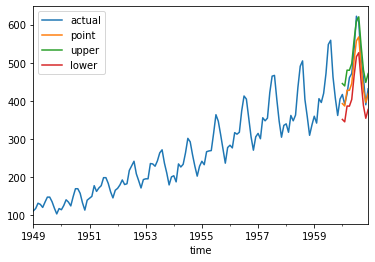

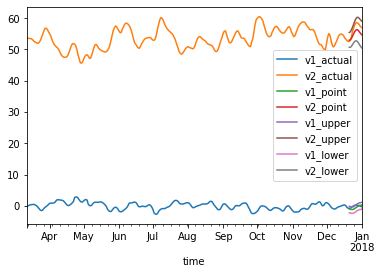

In [40]:
# Plot predictions

uni_plot_df.plot()

multi_plot_df.plot()